# CHAPTER 6 Ï∞®Ïõê Ï∂ïÏÜå

# 1. PCA(Principal Component Analysis)

- PCA Ïã§ÏäµÏùÄ ÏôÄÏù∏ Îç∞Ïù¥ÌÑ∞ÏÖã (Wine)ÏúºÎ°ú ÏßÑÌñâÌï©ÎãàÎã§. ÏïÑÎûòÏùò ÏÖÄÏùÑ Î°úÎìúÌïòÍ≥† Ïã§ÏäµÏùÑ ÏãúÏûëÌï¥Ï£ºÏÑ∏Ïöî.

In [1]:
from sklearn.datasets import load_wine
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# ÏÇ¨Ïù¥ÌÇ∑Îü∞ ÎÇ¥Ïû• Îç∞Ïù¥ÌÑ∞ ÏÖã API Ìò∏Ï∂ú
wine = load_wine()

# ÎÑòÌååÏù¥ Îç∞Ïù¥ÌÑ∞ ÏÖãÏùÑ Pandas DataFrameÏúºÎ°ú Î≥ÄÌôò
columns = wine.feature_names
wineDF = pd.DataFrame(wine.data, columns=columns)
wineDF['target'] = wine.target
wineDF.head(3)

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   

   od280/od315_of_diluted_wines  proline  target  
0                          3.92   1065.0       0  
1                          3.40   1050.0       0  
2                          3.17   1185.0       0

# 1-1. ÏõêÎ≥∏ ÏôÄÏù∏ Îç∞Ïù¥ÌÑ∞ ÏÑ∏Ìä∏Í∞Ä Ïñ¥ÎñªÍ≤å Î∂ÑÌè¨Îèº ÏûàÎäîÏßÄ Îëê Í∞úÏùò ÏÜçÏÑ±(alcohol,	malic_acid)ÏùÑ Í∞ÅÍ∞Å XÏ∂ï, YÏ∂ïÏúºÎ°ú Ìï¥ÏÑú 2Ï∞®ÏõêÏúºÎ°ú ÏãúÍ∞ÅÌôî Ìï¥Ï£ºÏÑ∏Ïöî.

- ##ÎãµÏïà## ÏùÑ Ï±ÑÏõåÏ£ºÏÑ∏Ïöî

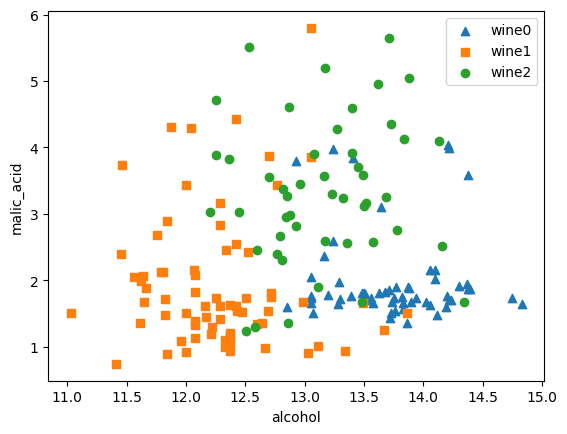

In [2]:
# wine0Îäî ÏÑ∏Î™®, wine1Îäî ÎÑ§Î™®, wine2Îäî ÎèôÍ∑∏ÎùºÎØ∏Î°ú ÌëúÌòÑ
markers=['^', 's', 'o']

# wine0Ïùò target Í∞íÏùÄ 0, wine1Îäî 1, wine2Îäî 2. Í∞Å targetÎ≥ÑÎ°ú Îã§Î•∏ Î™®ÏñëÏúºÎ°ú ÏÇ∞Ï†êÎèÑÎ°ú ÌëúÏãú
for i, marker in enumerate(markers):
    x_axis_data = wineDF[wineDF['target']==i] ['alcohol']
    y_axis_data = wineDF[wineDF['target']==i] ['malic_acid']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=f'wine{i}')

plt.legend()
plt.xlabel('alcohol')
plt.ylabel('malic_acid')
plt.show()

- PCA Ï†ÅÏö© Ï†Ñ, Í∞úÎ≥Ñ ÏÜçÏÑ± Ïä§ÏºÄÏùºÎßÅÌïòÎäî ÏÖÄÏùÑ Ïã§ÌñâÌï¥Ï£ºÏÑ∏Ïöî

In [3]:
from sklearn.preprocessing import StandardScaler

# Target Í∞íÏùÑ Ï†úÏô∏Ìïú Î™®Îì† ÏÜçÏÑ± Í∞íÏùÑ StandardScalerÎ•º Ïù¥Ïö©Ìï¥ ÌëúÏ§Ä Ï†ïÍ∑ú Î∂ÑÌè¨Î•º Í∞ÄÏßÄÎäî Í∞íÎì§Î°ú Î≥ÄÌôò
wine_scaled = StandardScaler().fit_transform(wineDF.iloc[:, :-1])

# 1-2. PCA Ï†ÅÏö© -> 4Ï∞®Ïõê ÏôÄÏù∏ Îç∞Ïù¥ÌÑ∞Î•º 2Ï∞®Ïõê PCA Îç∞Ïù¥ÌÑ∞Î°ú Î≥ÄÌôò

- ##ÎãµÏïà##ÏùÑ Ï±ÑÏõåÏ£ºÏÑ∏Ïöî.

In [4]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

# fit()Í≥º transform()ÏùÑ Ìò∏Ï∂úÌï¥ PCA Î≥ÄÌôò Îç∞Ïù¥ÌÑ∞ Î∞òÌôò
pca.fit(wineDF.drop('target', axis=1))
wine_pca = pca.transform(wineDF.drop('target', axis=1))
print(wine_pca)

[[ 3.18562979e+02  2.14921307e+01]
 [ 3.03097420e+02 -5.36471768e+00]
 [ 4.38061133e+02 -6.53730945e+00]
 [ 7.33240139e+02  1.92729032e-01]
 [-1.15714285e+01  1.84899946e+01]
 [ 7.03231192e+02 -3.32158674e-01]
 [ 5.42971581e+02 -1.35189666e+01]
 [ 5.48401860e+02  1.14494324e+01]
 [ 2.98036863e+02 -8.18015784e+00]
 [ 2.98049553e+02 -7.10154294e+00]
 [ 7.63079712e+02 -8.33431723e+00]
 [ 5.32943228e+02 -1.42876338e+01]
 [ 5.72834410e+02 -2.10050143e+01]
 [ 4.02925358e+02 -1.61026352e+01]
 [ 8.00053394e+02 -1.21184472e+01]
 [ 5.63245578e+02  2.21482866e+00]
 [ 5.33379651e+02  1.08048022e+01]
 [ 3.83317591e+02  8.47741982e+00]
 [ 9.33118387e+02 -8.35447844e+00]
 [ 9.84031775e+01  1.43926594e+01]
 [ 3.35935940e+01  2.55679565e+01]
 [ 2.31464375e+01  1.81747309e+00]
 [ 2.88093030e+02 -3.96304175e+00]
 [ 2.67981513e+02 -9.57070401e+00]
 [ 9.80198858e+01 -5.49584606e+00]
 [ 8.34987440e+01  2.28916215e+01]
 [ 4.47925596e+02 -1.47973313e+01]
 [ 5.37919165e+02 -1.53883461e+01]
 [ 1.68210468e+02  4

Î≥ÄÌôòÎêú PCA Îç∞Ïù¥ÌÑ∞ ÏÑ∏Ìä∏Î•º DataFrameÏúºÎ°ú Î≥ÄÌôòÌïòÏó¨ Îç∞Ïù¥ÌÑ∞Í∞í ÌôïÏù∏ÌïòÎäî ÏΩîÎìú ÏÖÄÏùÑ Ïã§ÌñâÌï¥Ï£ºÏÑ∏Ïöî.

In [5]:
# PCA Î≥ÄÌôòÎêú Îç∞Ïù¥ÌÑ∞Ïùò ÏπºÎüºÎ™ÖÏùÑ Í∞ÅÍ∞Å pca_component_1, pca_component_2Î°ú Î™ÖÎ™Ö

pca_columns=['pca_component_1','pca_component_2']
wineDF_pca = pd.DataFrame(wine_pca, columns=pca_columns)
wineDF_pca['target']=wine.target
wineDF_pca.head(3)

pca_component_1  pca_component_2  target
0       318.562979        21.492131       0
1       303.097420        -5.364718       0
2       438.061133        -6.537309       0

PCA Î≥ÄÌôòÎêú Îç∞Ïù¥ÌÑ∞ ÏÑ∏Ìä∏ 2Ï∞®Ïõê ÏãúÍ∞ÅÌôîÌïòÎäî ÏΩîÎìú ÏÖÄÏùÑ Ïã§ÌñâÌï¥Ï£ºÏÑ∏Ïöî.

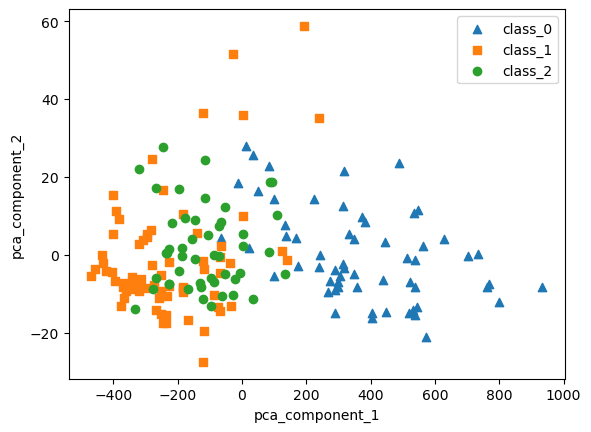

In [6]:
# wine0Î•º ÏÑ∏Î™®, wine1Î•º ÎÑ§Î™®, wine2Î•º ÎèôÍ∑∏ÎùºÎØ∏Î°ú ÌëúÏãú
markers=['^', 's', 'o']

# pca_component_1 ÏùÑ xÏ∂ï, pc_component_2Î•º yÏ∂ïÏúºÎ°ú scatter plot ÏàòÌñâ
for i, marker in enumerate(markers):
    x_axis_data = wineDF_pca[wineDF_pca['target']==i]['pca_component_1']
    y_axis_data = wineDF_pca[wineDF_pca['target']==i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=wine.target_names[i])

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

# 1-3. PCA ComponentÎ≥Ñ ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ Î≥ÄÎèôÏÑ± Î∞òÏòÅÎ•†ÏùÑ ÌôïÏù∏

- ##ÎãµÏïà##ÏùÑ Ï±ÑÏõåÏ£ºÏÑ∏Ïöî

In [8]:
print(pca.explained_variance_ratio_)

[0.99809123 0.00173592]


# 1-4. ÏõêÎ≥∏ ÏôÄÏù∏ Îç∞Ïù¥ÌÑ∞ ÏÑ∏Ìä∏ & PCAÎ°ú Î≥ÄÌôòÎêú Îç∞Ïù¥ÌÑ∞ ÏÑ∏Ìä∏Ïóê Í∞ÅÍ∞Å Î∂ÑÎ•ò Ï†ÅÏö©

# (1). ÏõêÎ≥∏ ÏôÄÏù∏ Îç∞Ïù¥ÌÑ∞Ïóê Random ForestÎ•º Ï†ÅÏö©ÌïòÍ∏∞ ÏúÑÌïú ##ÎãµÏïà##ÏùÑ Ï±ÑÏö∞ÏÑ∏Ïöî.

Ï°∞Í±¥ ) EstimatorÎäî RandomForestClassifierÎ•º Ïù¥Ïö©ÌïòÍ≥†
cross_val_score()Î°ú 3Í∞úÏùò ÍµêÏ∞® Í≤ÄÏ¶ù ÏÑ∏Ìä∏Î°ú Ï†ïÌôïÎèÑ Í≤∞Í≥ºÎ•º ÎπÑÍµêÌïòÏÑ∏Ïöî.

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

rcf = RandomForestClassifier(random_state=156)
scores = cross_val_score(rcf, wineDF.drop('target', axis=1), wineDF['target'], cv=3)
print('ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ ÍµêÏ∞® Í≤ÄÏ¶ù Í∞úÎ≥Ñ Ï†ïÌôïÎèÑ:',scores)
print('ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ ÌèâÍ∑† Ï†ïÌôïÎèÑ:', np.mean(scores))

ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ ÍµêÏ∞® Í≤ÄÏ¶ù Í∞úÎ≥Ñ Ï†ïÌôïÎèÑ: [0.95       0.89830508 1.        ]
ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ ÌèâÍ∑† Ï†ïÌôïÎèÑ: 0.9494350282485876


# (2). PCAÎ°ú Î≥ÄÌôòÎêú Îç∞Ïù¥ÌÑ∞ ÏÑ∏Ìä∏Ïóê Random ForestÎ•º Ï†ÅÏö©ÌïòÍ∏∞ ÏúÑÌïú ##ÎãµÏïà##ÏùÑ Ï±ÑÏö∞ÏÑ∏Ïöî.

Ï°∞Í±¥ ) EstimatorÎäî RandomForestClassifierÎ•º Ïù¥Ïö©ÌïòÍ≥† cross_val_score()Î°ú 3Í∞úÏùò ÍµêÏ∞® Í≤ÄÏ¶ù ÏÑ∏Ìä∏Î°ú Ï†ïÌôïÎèÑ Í≤∞Í≥ºÎ•º ÎπÑÍµêÌïòÏÑ∏Ïöî.

In [10]:
pca_X = wineDF_pca[['pca_component_1', 'pca_component_2']]
scores_pca = cross_val_score(rcf, pca_X, wineDF['target'], cv=3)
print('PCA Î≥ÄÌôò Îç∞Ïù¥ÌÑ∞ ÍµêÏ∞® Í≤ÄÏ¶ù Í∞úÎ≥Ñ Ï†ïÌôïÎèÑ:',scores_pca)
print( 'PCA Î≥ÄÌôò Îç∞Ïù¥ÌÑ∞ ÌèâÍ∑† Ï†ïÌôïÎèÑ:', np.mean(scores_pca))

PCA Î≥ÄÌôò Îç∞Ïù¥ÌÑ∞ ÍµêÏ∞® Í≤ÄÏ¶ù Í∞úÎ≥Ñ Ï†ïÌôïÎèÑ: [0.65       0.71186441 0.81355932]
PCA Î≥ÄÌôò Îç∞Ïù¥ÌÑ∞ ÌèâÍ∑† Ï†ïÌôïÎèÑ: 0.7251412429378531


# 2. LDA(Linear Discriminant Analysis)

# 2-1. PDAÏôÄ LDAÏùò Ï£ºÏöîÌïú Í≥µÌÜµÏ†êÍ≥º Ï∞®Ïù¥Ï†êÏùÑ Í∞ÅÍ∞Å Ìïú Í∞ÄÏßÄÏî© ÏÑ§Î™ÖÌïòÏÑ∏Ïöî.

**Í≥µÌÜµÏ†ê**

: Î™®Îëê ÏûÖÎ†• Îç∞Ïù¥ÌÑ∞ ÏÑ∏Ìä∏Î•º Ï†ÄÏ∞®Ïõê Í≥µÍ∞ÑÏóê Ìà¨ÏòÅÌï¥ Ï∞®ÏõêÏùÑ Ï∂ïÏÜåÌïòÎäî Í∏∞Î≤ïÏù¥Îã§.

---
**Ï∞®Ïù¥Ï†ê**

: PCAÎäî ÏûÖÎ†• Îç∞Ïù¥ÌÑ∞ Î≥ÄÎèôÏÑ±Ïùò Í∞ÄÏû• ÌÅ∞ Ï∂ïÏùÑ Ï∞æÎäî Î∞òÎ©¥, LDAÎäî ÏûÖÎ†• Îç∞Ïù¥ÌÑ∞Ïùò Í≤∞Ï†ï Í∞í ÌÅ¥ÎûòÏä§Î•º ÏµúÎåÄÌïúÏúºÎ°ú Î∂ÑÎ¶¨Ìï† Ïàò ÏûàÎäî Ï∂ïÏùÑ Ï∞æÎäîÎã§.

# 2-2. Í¥ÑÌò∏ ÏïàÏùò Îëê Îã®Ïñ¥ Ï§ë Ìï¥ÎãπÌïòÎäî Îã®Ïñ¥Î•º Í∞ÅÍ∞Å Ï†ÅÏúºÏÑ∏Ïöî.

# Î¨∏Ï†ú : Ï¢ãÏùÄ ÌÅ¥ÎûòÏä§ Î∂ÑÎ¶¨Î•º ÏúÑÌï¥ÏÑúÎäî ÌÅ¥ÎûòÏä§ Í∞Ñ Î∂ÑÏÇ∞Ïù¥ (1) (ÌÅ¨Í≥† / ÏûëÍ≥†), ÌÅ¥ÎûòÏä§ ÎÇ¥Î∂Ä Î∂ÑÏÇ∞Ïù¥ (2) (ÌÅ∞ / ÏûëÏùÄ) Í≤ÉÏùÑ ÏÑ†ÌÉùÌï¥Ïïº Ìï©ÎãàÎã§.

# **ÎãµÏïà :**

(1) ÌÅ¨Í≥†


(2) ÏûëÏùÄ

# **[ÏôÄÏù∏ Îç∞Ïù¥ÌÑ∞ ÏÑ∏Ìä∏Ïóê LDA Ï†ÅÏö©ÌïòÍ∏∞]**

ÏôÄÏù∏ Îç∞Ïù¥ÌÑ∞ ÏÑ∏Ìä∏ Î°úÎìúÌïòÍ≥†, ÌëúÏ§Ä Ï†ïÍ∑ú Î∂ÑÌè¨Î°ú Ïä§ÏºÄÏùºÎßÅÌïòÎäî ÏΩîÎìú ÏÖÄÏùÑ Ïã§ÌñâÏãúÏºúÏ£ºÏÑ∏Ïöî.

In [11]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine

wine = load_wine()
wine_scaled = StandardScaler().fit_transform(wine.data)

# 2-3. 2Í∞úÏùò Ïª¥Ìè¨ÎÑåÌä∏Î°ú ÏôÄÏù∏ Îç∞Ïù¥ÌÑ∞Î•º LDA Î≥ÄÌôòÌïòÎäî ÏΩîÎìú ÏÖÄÏùò ##ÎãµÏïà##ÏùÑ Ï±ÑÏö∞ÏÑ∏Ïöî.

In [14]:
Ida.fit(wineDF.drop('target', axis=1), wineDF['target'])
wine_Ida = Ida.transform(wineDF.drop('target', axis=1))
print(wine_Ida)

[[ 4.70024401  1.97913835]
 [ 4.30195811  1.17041286]
 [ 3.42071952  1.42910139]
 [ 4.20575366  4.00287148]
 [ 1.50998168  0.4512239 ]
 [ 4.51868934  3.21313756]
 [ 4.52737794  3.26912179]
 [ 4.14834781  3.10411765]
 [ 3.86082876  1.95338263]
 [ 3.36662444  1.67864327]
 [ 4.80587907  2.23536271]
 [ 3.42807646  2.17510939]
 [ 3.66610246  2.26248961]
 [ 5.58824635  2.05478773]
 [ 5.50131449  3.61304865]
 [ 3.18475189  2.88952528]
 [ 3.28936988  2.76584266]
 [ 2.99809262  1.42511132]
 [ 5.24640372  3.70982655]
 [ 3.13653106  1.97689922]
 [ 3.57747791  0.5624599 ]
 [ 1.69077135  0.91342136]
 [ 4.83515033  0.9147628 ]
 [ 3.09588961  0.61735888]
 [ 3.32164716  0.29847734]
 [ 2.14482223  0.16369247]
 [ 3.9824285   2.17515679]
 [ 2.68591432  1.21850924]
 [ 3.56309464  1.03817651]
 [ 3.17301573  1.37789624]
 [ 2.99626797  1.32419896]
 [ 3.56866244  2.34065478]
 [ 3.38506383  0.20123426]
 [ 3.5275375   1.71592739]
 [ 2.85190852  1.47070771]
 [ 2.79411996  0.23793093]
 [ 2.75808511  1.56970421]
 

# 2-4. LDA Î≥ÄÌôòÎêú ÏûÖÎ†• Îç∞Ïù¥ÌÑ∞ Í∞íÏùÑ 2Ï∞®Ïõê ÌèâÎ©¥Ïóê ÌíàÏ¢ÖÎ≥ÑÎ°ú ÌëúÌòÑÌïòÎäî ÏΩîÎìú ÏÖÄÏùò ##ÎãµÏïà##ÏùÑ Ï±ÑÏö∞ÏÑ∏Ïöî.

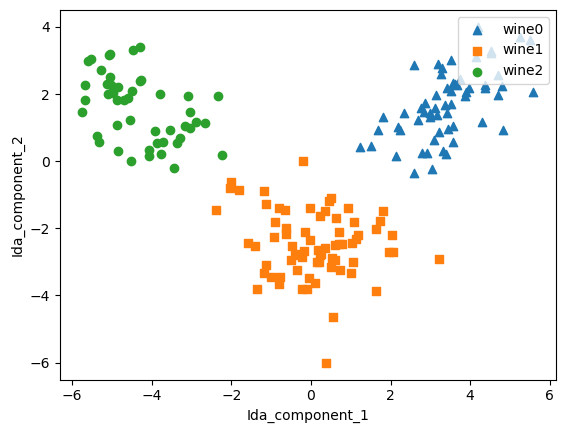

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Ida_columns=['Ida_component_1', 'Ida_component_2']
wineDF_Ida = pd.DataFrame(wine_Ida, columns=Ida_columns)
wineDF_Ida['target']=wine.target

# wine0Îäî ÏÑ∏Î™®, wine1Îäî ÎÑ§Î™®, wine2Îäî ÎèôÍ∑∏ÎùºÎØ∏Î°ú ÌëúÌòÑ
markers = ['^', 's', 'o']

# wine0Ïùò target Í∞íÏùÄ 0, wine1Îäî 1, wine2Îäî 2. Í∞Å targetÎ≥ÑÎ°ú Îã§Î•∏ Î™®ÏñëÏúºÎ°ú ÏÇ∞Ï†êÎèÑÎ°ú ÌëúÏãú
for i, marker in enumerate(markers):
    x_axis_data = wineDF_Ida [wineDF_Ida ['target']==i] ['Ida_component_1']
    y_axis_data = wineDF_Ida [wineDF_Ida['target']==i] ['Ida_component_2']

    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=f'wine{i}')

plt.legend(loc='upper right')
plt.xlabel('Ida_component_1')
plt.ylabel('Ida_component_2')
plt.show()

# 3. SVD

# 3-1) SVD Ïó∞ÏÇ∞ Î∞è Î∂ÑÌï¥ÌïòÍ∏∞

ÎûúÎç§Ìïú 2Ï∞®Ïõê ÌñâÎ†¨ AÎ•º ÏÉùÏÑ±Ìï¥ ÌäπÏù¥Í∞í Î∂ÑÌï¥ÌïòÍ≥†, Î∂ÑÌï¥Îêú ÌñâÎ†¨ÏùÑ Ïù¥Ïö©Ìï¥ ÏõêÎ≥∏ ÌñâÎ†¨Î°ú Îã§Ïãú Î≥µÏõêÌï¥ Î¥ÖÏãúÎã§.

(1) ÌñâÎ†¨ A ÏÉùÏÑ±

: ÎÑòÌååÏù¥Ïùò rand() Ìï®ÏàòÎ•º Ïù¥Ïö©Ìï¥ 3x3 ÌÅ¨Í∏∞Ïùò ÎûúÎç§Ìïú Í∞íÏùÑ Í∞ñÎäî ÌñâÎ†¨ AÎ•º ÏÉùÏÑ±Ìï¥ Ï£ºÏÑ∏Ïöî.

In [16]:
import numpy as np

# 3x3 ÎûúÎç§ ÌñâÎ†¨ A ÏÉùÏÑ±
np.random.seed(121)
A = A = np.random.rand(3, 3)
print(np.round(A,3))

[[0.111 0.211 0.233]
 [0.152 0.83  0.408]
 [0.556 0.746 0.248]]


(2) SVD (ÌäπÏù¥Í∞í Î∂ÑÌï¥)

: ÎÑòÌååÏù¥Ïùò SVD Î™®ÎìàÎ°ú A ÌñâÎ†¨Ïóê SVDÎ•º Ï†ÅÏö©Ìï¥ U, Sigma, VtÎ•º Î∞òÌôòÎ∞õÏïÑ Í∑∏ ÌÅ¨Í∏∞ÏôÄ Í∞íÏùÑ Ï∂úÎ†•Ìï¥ Ï£ºÏÑ∏Ïöî.

(ÌñâÎ†¨ ÏõêÏÜå Í∞íÏùÄ ÏÜåÏàòÏ†ê ÏïÑÎûò 3ÏûêÎ¶¨ÍπåÏßÄ Î∞òÏò¨Î¶ºÌï¥ÏÑú Ï∂úÎ†•)

In [18]:
from numpy.linalg import svd

U, Sigma, Vt =svd(A)

# U, Sigma, VtÏùò ÌÅ¨Í∏∞ Ï∂úÎ†•
print(U.shape, Sigma.shape, Vt.shape)

# U, Sigma, Vt ÌñâÎ†¨ Ï∂úÎ†•
print('U matrix:\n', np.round(U, 3))
print('Sigma Value:\n', np.round(Sigma, 3))
print('V transpose matrix:\n', np.round(Vt, 3))

(3, 3) (3,) (3, 3)
U matrix:
 [[-0.229 -0.148 -0.962]
 [-0.679 -0.684  0.267]
 [-0.697  0.715  0.057]]
Sigma Value:
 [1.342 0.315 0.123]
V transpose matrix:
 [[-0.385 -0.843 -0.375]
 [ 0.878 -0.209 -0.43 ]
 [-0.284  0.495 -0.821]]


(3) U, Sigma, VtÎ•º Ïù¥Ïö©Ìï¥ ÏõêÎ≥∏ ÌñâÎ†¨ A Î≥µÏõêÌïòÍ∏∞

: ÎÑòÌååÏù¥(np)Ïùò dot Ïó∞ÏÇ∞ÏùÑ Ïù¥Ïö©Ìï¥ ÏõêÎ≥∏ ÌñâÎ†¨ AÎ•º Í≥ÑÏÇ∞Ìï¥ Ï£ºÏÑ∏Ïöî.

(üí° Sigma ÌñâÎ†¨ÏùÄ ÌòÑÏû¨ ÎåÄÍ∞ÅÏõêÏÜå Í∞íÎßåÏùÑ Í∞ÄÏßÄÎäî 1Ï∞®Ïõê Î≤°ÌÑ∞Ïù¥ÎØÄÎ°ú, 0ÏùÑ Ìè¨Ìï®Ìïú ÎåÄÏπ≠ÌñâÎ†¨Î°ú Î≥ÄÌôò ÌõÑ Í≥ÑÏÇ∞Ìï¥Ïïº Ìï©ÎãàÎã§ - ÎÑòÌååÏù¥Ïùò diag Ìï®Ïàò ÏÇ¨Ïö©!)

In [19]:
# SigmaÎ•º Îã§Ïãú 0ÏùÑ Ìè¨Ìï®Ìïú ÎåÄÏπ≠ ÌñâÎ†¨Î°ú Î≥ÄÌôò
Sigma_mat = np.diag(Sigma)

# Î≥µÏõê ÌñâÎ†¨ A_ Í≥ÑÏÇ∞
A_ = np.dot(U, np.dot(Sigma_mat, Vt))

print(np.round(A_, 3))

[[0.111 0.211 0.233]
 [0.152 0.83  0.408]
 [0.556 0.746 0.248]]


# 3-2) row Í∞Ñ ÏùòÏ°¥ÏÑ±ÏùÑ Í∞ñÎäî Îç∞Ïù¥ÌÑ∞ ÏÑ∏Ìä∏Ïóê SVD Ï†ÅÏö©ÌïòÍ≥† Î≥µÏõêÌïòÍ∏∞

Ïù¥Î≤àÏóêÎäî row Í∞Ñ ÏùòÏ°¥ÏÑ±Ïù¥ ÏûàÎäî Îç∞Ïù¥ÌÑ∞ ÏÑ∏Ìä∏Ïóê SVDÎ•º Ï†ÅÏö©Ìï¥ Sigma Í∞íÏù¥ Ïñ¥ÎñªÍ≤å Îã¨ÎùºÏßÄÎäîÏßÄ Í¥ÄÏ∞∞ÌïòÍ≥†, 0Ïù¥ ÏïÑÎãå Sigma Í∞íÎßåÏùÑ Ïù¥Ïö©Ìï¥ ÌñâÎ†¨ AÎ•º Î≥µÏõêÌï¥ Î¥ÖÏãúÎã§.

(1) AÎ•º row Í∞Ñ ÏùòÏ°¥ÏÑ±Ïù¥ ÏûàÎäî Í∞íÏúºÎ°ú ÏàòÏ†ïÌïòÍ∏∞

: AÏùò 1Î≤àÏß∏ Î°úÏö∞Í∞Ä 2Î≤àÏß∏ Î°úÏö∞ÏôÄ 3Î≤àÏß∏ Î°úÏö∞ Í∞íÏùò Ìï©ÏùÑ Í∞ÄÏßÄÎèÑÎ°ù Í∞íÏùÑ ÏàòÏ†ïÌï¥ Ï£ºÏÑ∏Ïöî.

In [20]:
A[0] = A[1] + A[2]
print(np.round(A, 3))

[[0.708 1.576 0.656]
 [0.152 0.83  0.408]
 [0.556 0.746 0.248]]


(2) ÏàòÏ†ïÎêú AÏóê SVDÎ•º Îã§Ïãú Ï†ÅÏö©Ìï¥ U, Sigma, Vt ÌñâÎ†¨Ïùò ÌÅ¨Í∏∞ÏôÄ Í∞íÏùÑ ÌôïÏù∏ÌïòÍ∏∞

In [21]:
U, Sigma, Vt = svd(A)

# U, Sigma, VtÏùò ÌÅ¨Í∏∞ Ï∂úÎ†•
print(U.shape, Sigma.shape, Vt.shape)

# U, Sigma, Vt ÌñâÎ†¨ Ï∂úÎ†•
print('U matrix:\n', np.round(U, 3))
print('Sigma Value:\n', np.round(Sigma, 3))
print('V transpose matrix:\n', np.round(Vt, 3))

(3, 3) (3,) (3, 3)
U matrix:
 [[-0.816 -0.007 -0.577]
 [-0.402 -0.71   0.577]
 [-0.414  0.704  0.577]]
Sigma Value:
 [2.263 0.312 0.   ]
V transpose matrix:
 [[-0.384 -0.852 -0.355]
 [ 0.892 -0.243 -0.382]
 [-0.24   0.463 -0.853]]


(3) SigmaÏùò Í∞íÏù¥ 0Ïù∏ ÏöîÏÜåÎ•º Ï†úÏô∏ÌïòÍ≥† A Î≥µÏõêÌïòÍ∏∞

: SigmaÍ∞Ä 0Ïù∏ Îç∞Ïù¥ÌÑ∞Î•º Ï†úÏô∏ÌïòÍ≥† Î≥µÏõêÌï¥ Î¥ÖÏãúÎã§. SigmaÏóêÏÑú 0 Í∞íÏùÑ Ï†úÏô∏ÌñàÎã§Î©¥, Ïù¥Ïóê ÎåÄÏùëÎêòÎäî U, VtÏùò Í∞íÎèÑ Ï†úÏô∏Ìï¥ Ï£ºÏñ¥Ïïº Ìï©ÎãàÎã§.

In [24]:
# U ÌñâÎ†¨Ïùò Í≤ΩÏö∞ SigmaÏôÄ ÎÇ¥Ï†Å ÏàòÌñâ -> Sigma Îç∞Ïù¥ÌÑ∞Í∞Ä 0Ïù¥ ÏïÑÎãå Í∞íÏóê ÎåÄÏùëÎêòÎäî Ïó¥Îßå Ï∂îÏ∂ú
U_ = U[:, Sigma != 0]
Sigma_ = Sigma[Sigma != 0]

# Vt ÌñâÎ†¨ ÎòêÌïú SigmaÏôÄ ÎÇ¥Ï†Å ÏàòÌñâ -> Sigma Îç∞Ïù¥ÌÑ∞Í∞Ä 0Ïù¥ ÏïÑÎãå Í∞íÏóê ÎåÄÏùëÎêòÎäî ÌñâÎßå Ï∂îÏ∂ú
Vt_ = Vt[Sigma != 0, :]

print(U_.shape, Sigma_.shape, Vt_.shape)

# U, Sigma, VtÏùò ÎÇ¥Ï†ÅÏùÑ ÏàòÌñâÌïòÎ©∞, Îã§Ïãú ÏõêÎ≥∏ ÌñâÎ†¨ Î≥µÏõê
A_ = np.dot(U_, np.dot(np.diag(Sigma_), Vt_))
print(np.round(A_,3))

(3, 3) (3,) (3, 3)
[[0.708 1.576 0.656]
 [0.152 0.83  0.408]
 [0.556 0.746 0.248]]


# 3-3) ÏÇ¨Ïù¥ÌÇ∑Îü∞Ïùò TruncatedSVD ÌÅ¥ÎûòÏä§Î•º Ïù¥Ïö©Ìï¥ Î≥ÄÌôòÌïòÍ∏∞
ÏÇ¨Ïù¥ÌÇ∑Îü∞Ïùò TruncatedSVD ÌÅ¥ÎûòÏä§Î•º Ïù¥Ïö©Ìï¥ ÏÇ¨Ïù¥ÌÇ∑Îü∞Ïùò wine Îç∞Ïù¥ÌÑ∞Î•º Î≥ÄÌôòÌïòÍ≥†, PCA Î≥ÄÌôò Í≤∞Í≥ºÏôÄÎèÑ ÎπÑÍµêÌï¥ Î¥ÖÏãúÎã§.

- Î™®Îìà ÏûÑÌè¨Ìä∏ & Îç∞Ïù¥ÌÑ∞ÏÖã Î°úÎìú

In [25]:
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

wine = load_wine()
wine_ftrs = wine.data

(1) TruncatedSVD Í∞ùÏ≤¥ ÏÉùÏÑ±ÌïòÍ≥† Î≥ÄÌôò ÏàòÌñâÌïòÍ∏∞

: 3Í∞úÏùò Ï£ºÏöî componentÎ°ú TruncatedSVD Í∞ùÏ≤¥Î•º ÏÉùÏÑ±ÌïòÍ≥†, fit()Í≥º transform() Ìï®ÏàòÎ•º Ïù¥Ïö©Ìï¥ Îç∞Ïù¥ÌÑ∞Î•º Î≥ÄÌôòÌï¥ Ï£ºÏÑ∏Ïöî.

In [26]:
# 3Í∞úÏùò Ï£ºÏöî componentÎ°ú TruncatedSVD Î≥ÄÌôò
tsvd = TruncatedSVD(n_components=3)
tsvd.fit(wine.data)
wine_tsvd = tsvd.transform(wine.data)

(2) Scatter plot 2Ï∞®ÏõêÏúºÎ°ú Î≥ÄÌôòÎêú Îç∞Ïù¥ÌÑ∞ ÏãúÍ∞ÅÌôîÌïòÍ∏∞

: matplotlib.pyplot ÎùºÏù¥Î∏åÎü¨Î¶¨Î°ú Î≥ÄÌôòÎêú Îç∞Ïù¥ÌÑ∞Î•º ÌëúÌòÑÌï¥ Ï£ºÏÑ∏Ïöî. xÏ∂ïÏùÄ wine_tsvdÏùò 0Î≤àÏß∏ Ïó¥, yÏ∂ïÏùÄ wine_tsvdÏùò 1Î≤àÏß∏ Ïó¥Î°ú ÏÑ§Ï†ïÌïòÍ≥† Îç∞Ïù¥ÌÑ∞Îäî ÌÉÄÍ≤üÍ∞íÏúºÎ°ú ÏÑ§Ï†ïÌï¥ Ï£ºÏÑ∏Ïöî.

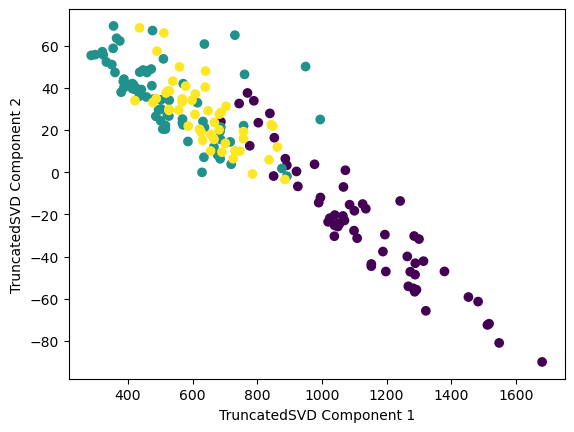

In [27]:
# Scatter plot 2Ï∞®ÏõêÏúºÎ°ú TruncatedSVD Î≥ÄÌôò Îêú Îç∞Ïù¥ÌÑ∞ ÌëúÌòÑ
plt.scatter(x = wine_tsvd[:, 0], y = wine_tsvd[:, 1], c = wine.target)
plt.xlabel('TruncatedSVD Component 1')
plt.ylabel('TruncatedSVD Component 2')

plt.show()

# 4. LMF

wine Îç∞Ïù¥ÌÑ∞Î•º ÏÇ¨Ïù¥ÌÇ∑Îü∞Ïùò NMF ÌÅ¥ÎûòÏä§Î•º Ïù¥Ïö©Ìï¥ 3Í∞úÏùò Ïª¥Ìè¨ÎÑåÌä∏Î°ú Î≥ÄÌôòÌïòÍ≥† Ïù¥Î•º ÏãúÍ∞ÅÌôîÌï¥ Î¥ÖÏãúÎã§.

- ÏúÑ 1-3) Î¨∏Ï†úÏùò Î™®Îìà ÏûÑÌè¨Ìä∏ & Îç∞Ïù¥ÌÑ∞ÏÖã Î°úÎìú ÏÖÄÏùÑ Ïã§ÌñâÌïòÍ≥† ÏßÑÌñâÌï¥ Ï£ºÏÑ∏Ïöî!

(1) NMF Í∞ùÏ≤¥ ÏÉùÏÑ±ÌïòÍ≥† Î≥ÄÌôò ÏàòÌñâÌïòÍ∏∞

: 3Í∞úÏùò Ï£ºÏöî componentÎ°ú NMF Í∞ùÏ≤¥Î•º ÏÉùÏÑ±ÌïòÍ≥†, fit()Í≥º transform() Ìï®ÏàòÎ•º Ïù¥Ïö©Ìï¥ Îç∞Ïù¥ÌÑ∞Î•º Î≥ÄÌôòÌï¥ Ï£ºÏÑ∏Ïöî.

In [28]:
from sklearn.decomposition import NMF

# NMF Í∞ùÏ≤¥ ÏÉùÏÑ±
nmf = NMF(n_components=3, init='random', random_state=42)

# Î≥ÄÌôòÌïòÍ∏∞
nmf.fit(wine.data)
wine_nmf = nmf.transform(wine.data)

(2) Scatter plot 2Ï∞®ÏõêÏúºÎ°ú Î≥ÄÌôòÎêú Îç∞Ïù¥ÌÑ∞ ÏãúÍ∞ÅÌôîÌïòÍ∏∞

: matplotlib.pyplot ÎùºÏù¥Î∏åÎü¨Î¶¨Î°ú Î≥ÄÌôòÎêú Îç∞Ïù¥ÌÑ∞Î•º ÌëúÌòÑÌï¥ Ï£ºÏÑ∏Ïöî. xÏ∂ïÏùÄ wine_nmfÏùò 0Î≤àÏß∏ Ïó¥, yÏ∂ïÏùÄ wine_nmfÏùò 1Î≤àÏß∏ Ïó¥Î°ú ÏÑ§Ï†ïÌïòÍ≥† Îç∞Ïù¥ÌÑ∞Îäî ÌÉÄÍ≤üÍ∞íÏúºÎ°ú ÏÑ§Ï†ïÌï¥ Ï£ºÏÑ∏Ïöî.

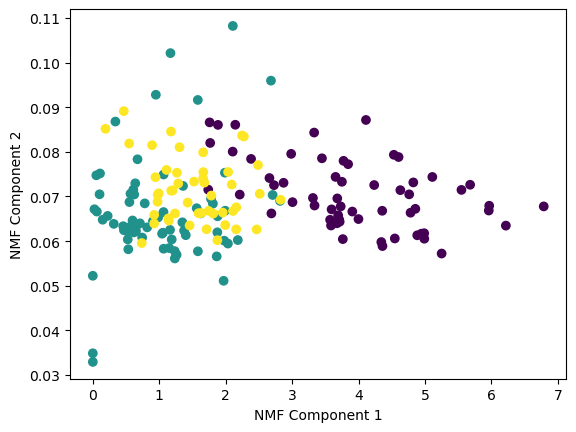

In [29]:
# Scatter plot 2Ï∞®ÏõêÏúºÎ°ú NMF Î≥ÄÌôò Îêú Îç∞Ïù¥ÌÑ∞ ÌëúÌòÑ
plt.scatter(x = wine_nmf[:, 0], y = wine_nmf[:, 1], c = wine.target)
plt.xlabel('NMF Component 1')
plt.ylabel('NMF Component 2')

plt.show()

# 5. T-SNE

Îç∞Ïù¥ÌÑ∞ ÏÑ∏Ìä∏: https://www.kaggle.com/datasets/zalando-research/fashionmnist?select=fashion-mnist_test.csv

# 5-1. T-SNEÎ•º Ï†ÅÏö©ÌïòÏó¨ 2Ï∞®ÏõêÏúºÎ°ú Ï∂ïÏÜåÌïòÏÑ∏Ïöî.

In [ ]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
fashion_df = pd.read_csv(r"C:\Users\lynn\Documents\my_data\fashion-mnist_test.csv\fashion-mnist_test.csv")

# Ïù¥ÎØ∏ÏßÄ ÌîΩÏÖÄ Ï†ïÎ≥¥Îßå
X = fashion_df.iloc[:, 1:]
y = fashion_df.iloc[:, 0]

# ÌëúÏ§ÄÌôî
X_norm = StandardScaler().fit_transform(X)

# Ï∞®Ïõê Ï∂ïÏÜå
tsne = TSNE(random_state=42)
X_tsne = tsne.fit_transform(X_norm)

print('Number of Features in Fashion-MNIST Dataset Before T-SNE : {}\n\nNumber of Features in Fashion-MNIST Dataset After T-SNE : {}'.format(X.shape[1], X_tsne.shape[1]))

Number of Features in Fashion-MNIST Dataset Before T-SNE : 784

Number of Features in Fashion-MNIST Dataset After T-SNE : 2


# 5-2. T-SNEÎ•º Ï†ÅÏö©Ìïú Îç∞Ïù¥ÌÑ∞Î•º Ïù¥Ïö©Ìï¥ ÏãúÍ∞ÅÌôîÎ•º ÏßÑÌñâÌïòÏÑ∏Ïöî.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches

# ÏãúÍ∞ÅÌôî Ìï®Ïàò Ï†ïÏùò
def plot_labelled_scatter(X, y, class_labels, s):
    num_labels = len(class_labels)

    x_min, x_max = X[:, 0].min() -1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() -1, X[:, 1].max() + 1

    color_array = ['#FF6F61', '#6B5B95', '#88B04B', '#F7CAC9', '#92A8D1', '#955251', '#B565A7', '#009B77', '#DD4124', '#45B8AC']
    cmap_bold = ListedColormap(color_array)
    bnorm = BoundaryNorm(np.arange(0, num_labels + 1, 1), ncolors=num_labels)
    plt.figure(figsize=s)

    plt.scatter(X[:, 0], X[:, 1], s=80, c=y, cmap=cmap_bold, norm=bnorm, alpha=0.4, edgecolor='black', lw=1)
    sp = plt.gca().spines
    sp['top'].set_visible(False)
    sp['right'].set_visible(False)

    plt.grid(which='both', color='lightslategrey', alpha=0.3)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    h = []
    for c in range(0, num_labels):
        h.append(mpatches.Patch(color=color_array[c], label=class_labels[c]))
    plt.legend(handles=h, fontsize=12, frameon=False)

# ÏãúÍ∞ÅÌôî Ìï®Ïàò Ïã§Ìñâ
plot_labelled_scatter(
    X_tsne,
    y,
    ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
     'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'],
    (15, 9)
)

plt.xlabel('First T-SNE Dimension', fontsize=14)
plt.ylabel('Second T-SNE Dimension', fontsize=14)
plt.title('Fashion MNIST Dataset T-SNE', fontsize=17)

# 6. UMAP

# 6-1. UMAPÏùÑ Ï†ÅÏö©ÌïòÏó¨ Ïù¥ÎØ∏ÏßÄ Îç∞Ïù¥ÌÑ∞Ïùò Ï∞®ÏõêÏùÑ 2Ï∞®ÏõêÏúºÎ°ú Ï∂ïÏÜåÌïòÏÑ∏Ïöî.

In [ ]:
from sklearn.preprocessing import StandardScaler
import umap
import pandas as pd

# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
fashion_df = pd.read_csv(r"C:\Users\lynn\Documents\my_data\fashion-mnist_test.csv\fashion-mnist_test.csv")

# ÏûÖÎ†•Í∞íÍ≥º Î†àÏù¥Î∏î Î∂ÑÎ¶¨
X = fashion_df.iloc[:, 1:]
y = fashion_df.iloc[:, 0]

# ÌëúÏ§ÄÌôî
X_scaled = StandardScaler().fit_transform(X)

# UMAP Í∞ùÏ≤¥ ÏÉùÏÑ± Î∞è Ï∞®Ïõê Ï∂ïÏÜå ÏàòÌñâ
um = umap.UMAP(random_state=42)
X_umap = um.fit_transform(X_scaled)

print('Number of Features in Fashion MNIST Dataset Before UMAP : {}\n\nNumber of Features in Fashion MNIST Dataset After UMAP: {}'.format(X.shape[1], X_umap.shape[1]))

Number of Features in Fashion MNIST Dataset Before UMAP : 784

Number of Features in Fashion MNIST Dataset After UMAP: 2


# 6-2. UMAPÏúºÎ°ú Ï∞®Ïõê Ï∂ïÏÜåÌïú Îç∞Ïù¥ÌÑ∞Î•º ÏãúÍ∞ÅÌôîÌïòÏÑ∏Ïöî.

In [ ]:
# Îã§Ïùå ÏΩîÎìúÎ•º Ïã§ÌñâÌïòÏÑ∏Ïöî
!pip install umap-learn

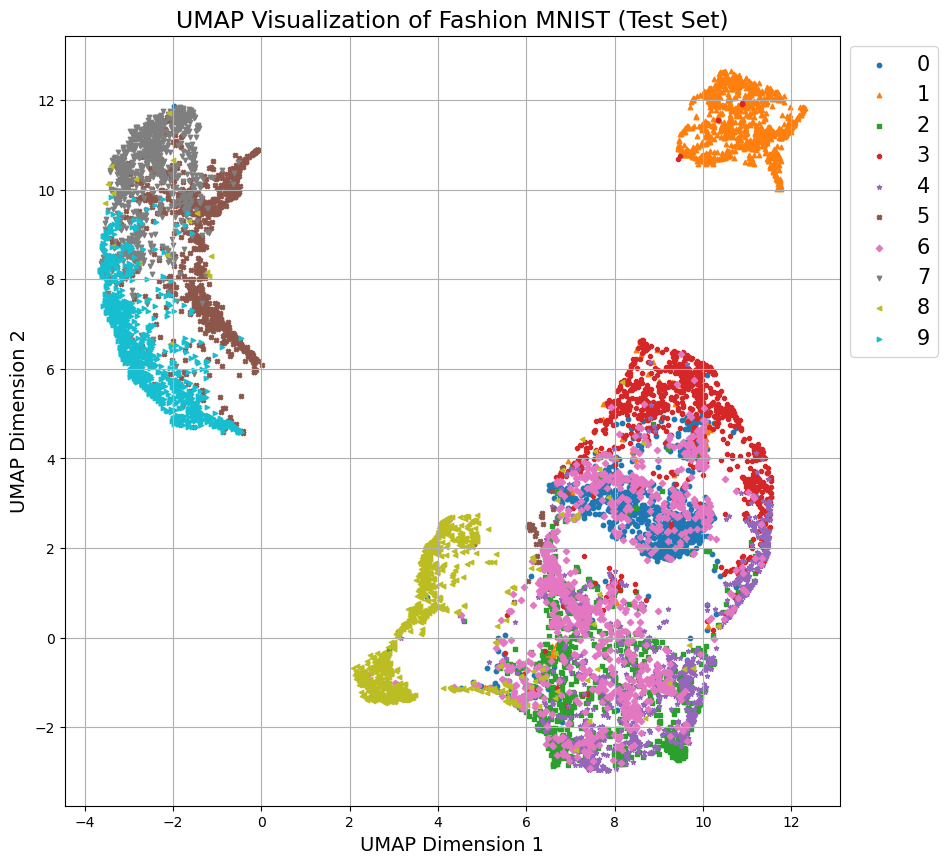

In [ ]:
import matplotlib.pyplot as plt

markers = ['o', '^', 's', 'P', '*', 'X', 'D', 'v', '<', '>']

plt.figure(figsize=(10, 10))
for i, marker in enumerate(markers):
    plt.scatter(*X_umap[y == i].T, label=i, s=10, alpha=1, marker=marker)

plt.legend(bbox_to_anchor=(1.00, 1), loc='upper left', fontsize=15)
plt.xlabel('UMAP Dimension 1', fontsize=14)
plt.ylabel('UMAP Dimension 2', fontsize=14)
plt.title('UMAP Visualization of Fashion MNIST (Test Set)', fontsize=17)
plt.grid(True)
plt.show()

Ï∫êÍ∏Ä ÌïÑÏÇ¨ Í≥ºÏ†ú

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches
import seaborn as sns
from sklearn.datasets import load_breast_cancer #Loading the full DataSet From Sklearn Library

# Breast cancer dataset
cancer = load_breast_cancer()
(X_canc, y_canc) = load_breast_cancer(return_X_y = True)

In [11]:
def plot_labelled_scatter(X, y, class_labels,s):
    num_labels = len(class_labels)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    marker_array = ['o', '^', '*']
    color_array = ['#FFFF00', '#00AAFF', '#000000', '#FF00AA']
    cmap_bold = ListedColormap(color_array)
    bnorm = BoundaryNorm(np.arange(0, num_labels + 1, 1), ncolors=num_labels)
    plt.figure(figsize=s)
    
    plt.scatter(X[:, 0], X[:, 1], s=80, c=y, cmap=cmap_bold, norm = bnorm, alpha = 0.4, edgecolor='black', lw = 1)
    sp = plt.gca().spines
    sp['top'].set_visible(False)
    sp['right'].set_visible(False)
    
    plt.grid(which='both',color='lightslategrey',alpha=0.3)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    h = []
    for c in range(0, num_labels):
        h.append(mpatches.Patch(color=color_array[c], label=class_labels[c]))
    plt.legend(handles=h,fontsize=15,frameon=False)

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

canc_norm = StandardScaler().fit(X_canc).transform(X_canc)  

pca = PCA(n_components = 2).fit(canc_norm) #Fitting PCA with 2 Components

canc_pca = pca.transform(canc_norm)

print('Number of Features in Breat Cancer DataSet Before PCA : {}\n\nNumber of Features in Breast Cancer DataSet After PCA : {}'
      .format(X_canc.shape[1],canc_pca.shape[1]))

Number of Features in Breat Cancer DataSet Before PCA : 30

Number of Features in Breast Cancer DataSet After PCA : 2


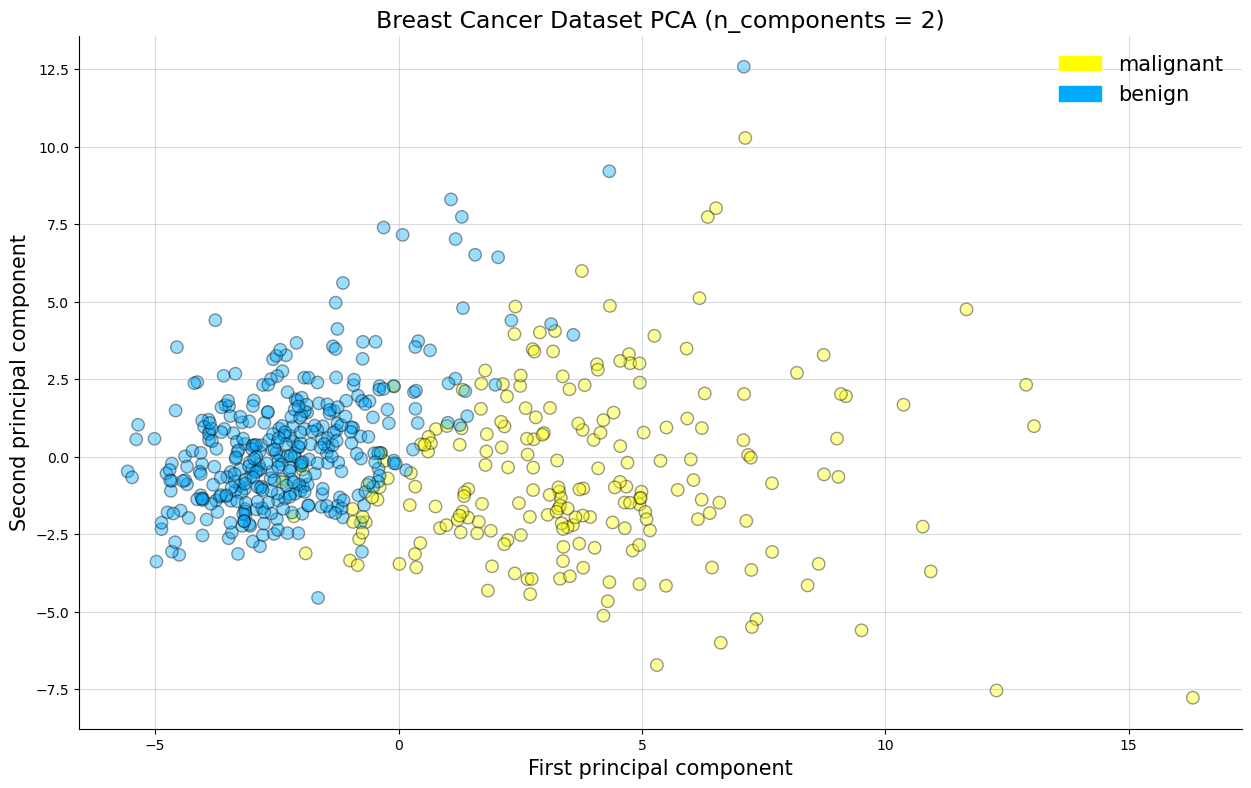

In [13]:
plot_labelled_scatter(canc_pca, y_canc, ['malignant', 'benign'],(15,9)) #Using the Helper Function

#Labelling
plt.xlabel('First principal component',fontsize=15)
plt.ylabel('Second principal component',fontsize=15)
plt.title('Breast Cancer Dataset PCA (n_components = 2)',fontsize=17);
plt.show()

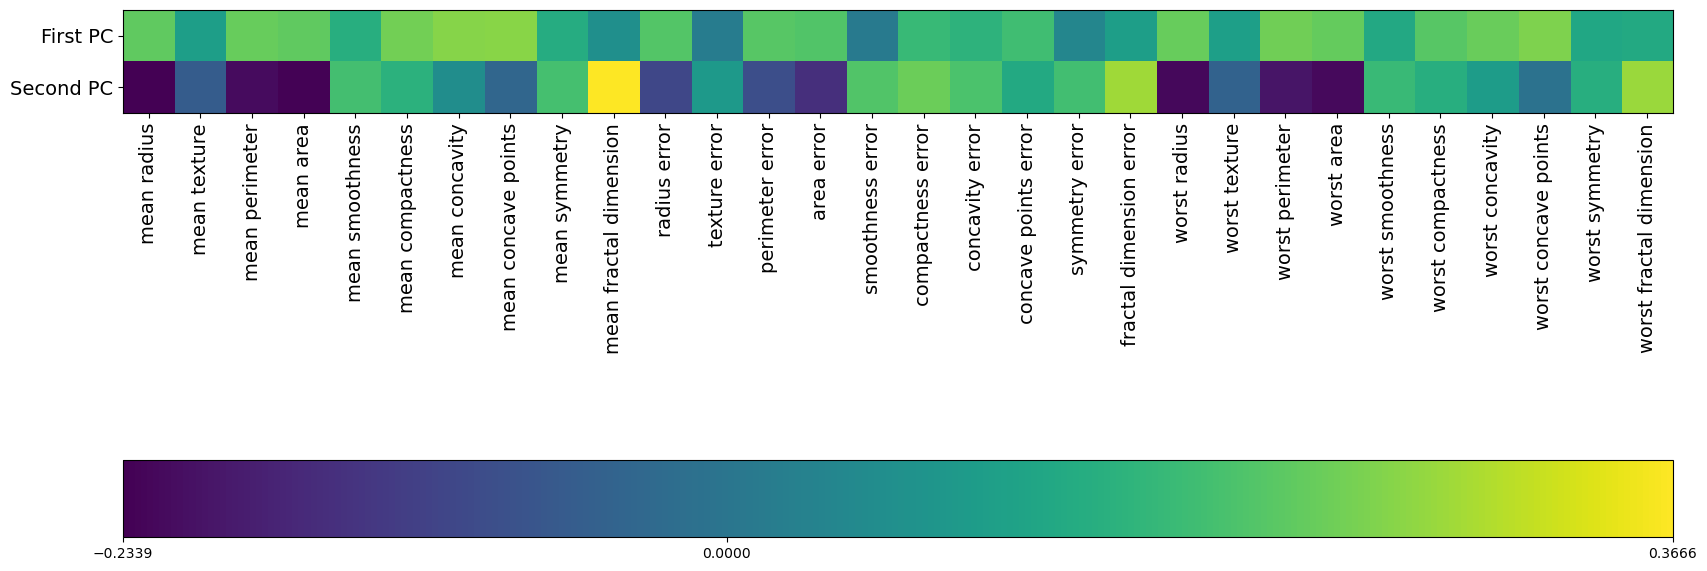

In [12]:
fig = plt.figure(figsize=(20,9))
plt.imshow(pca.components_, interpolation = 'none', cmap = 'viridis')
feature_names = list(cancer.feature_names)

plt.gca().set_xticks(np.arange(len(feature_names)));
plt.gca().set_yticks(np.arange(2));
plt.gca().set_xticklabels(feature_names, rotation=90, fontsize=14);
plt.gca().set_yticklabels(['First PC', 'Second PC'], fontsize=14);

plt.colorbar(orientation='horizontal', ticks=[pca.components_.min(), 0, 
                                              pca.components_.max()], pad=0.5);
plt.show()                                             

Number of Features in Breat Cancer DataSet Before MDS : 30

Number of Features in Breast Cancer DataSet After MDS : 2


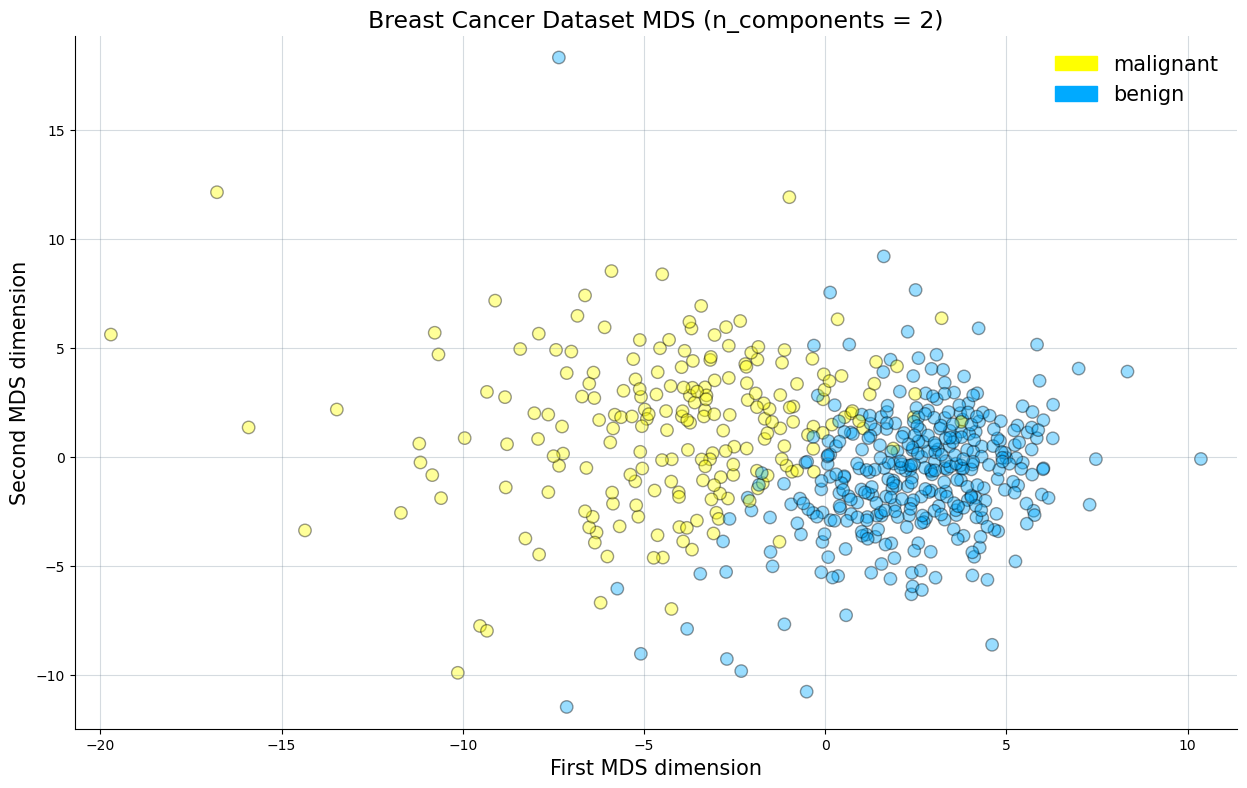

In [10]:
from sklearn.manifold import MDS

mds = MDS(n_components = 2,random_state = 2)

canc_mds = mds.fit_transform(canc_norm)

print('Number of Features in Breat Cancer DataSet Before MDS : {}\n\nNumber of Features in Breast Cancer DataSet After MDS : {}'
      .format(X_canc.shape[1],canc_mds.shape[1]))

plot_labelled_scatter(canc_mds, y_canc, ['malignant', 'benign'],(15,9))

plt.xlabel('First MDS dimension',fontsize=15)
plt.ylabel('Second MDS dimension',fontsize=15)
plt.title('Breast Cancer Dataset MDS (n_components = 2)',fontsize=17);
plt.show()

Number of Features in Breat Cancer DataSet Before T-SNE : 30

Number of Features in Breast Cancer DataSet After T-SNE : 2


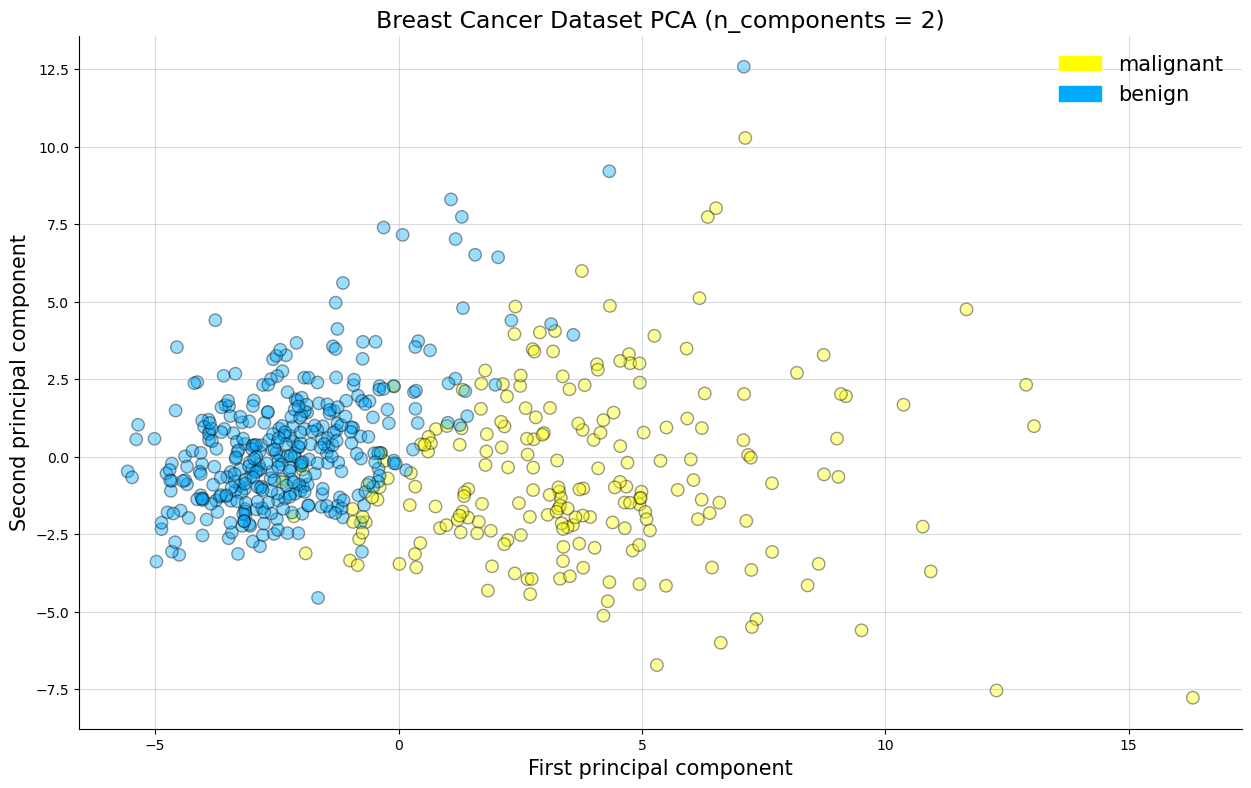

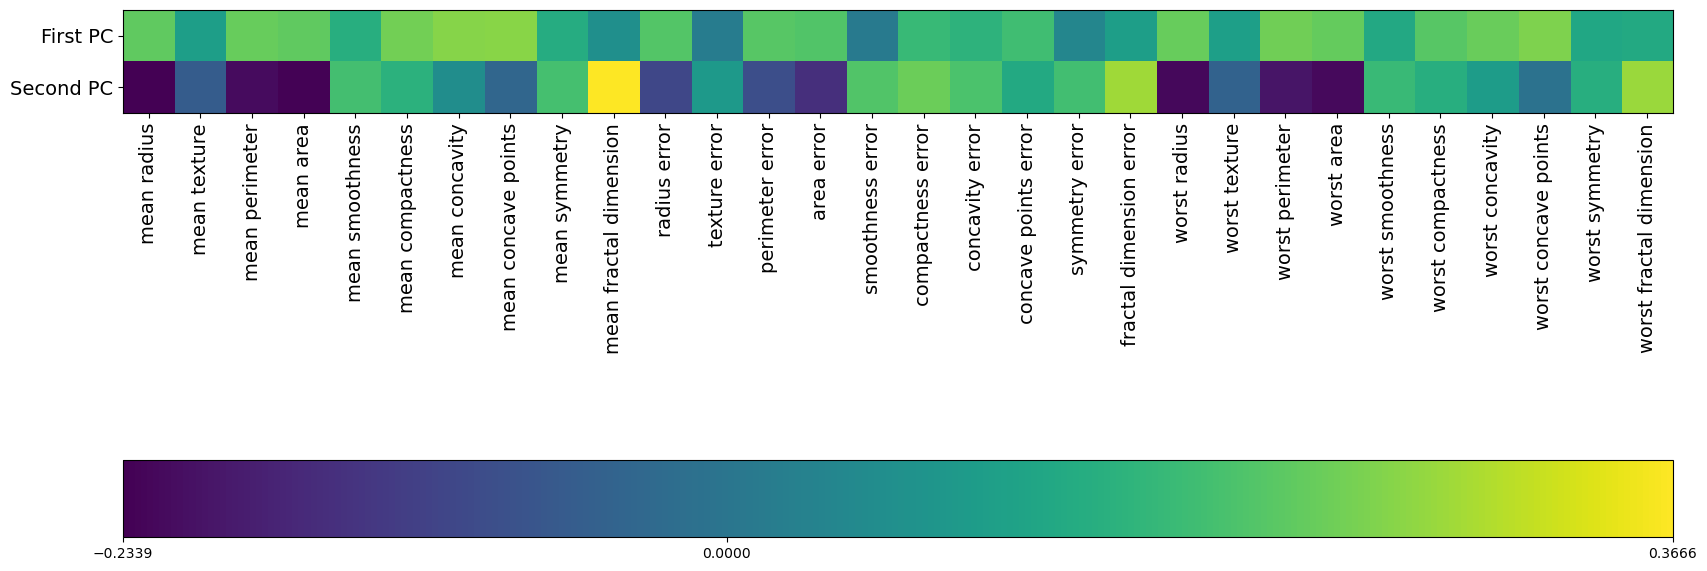

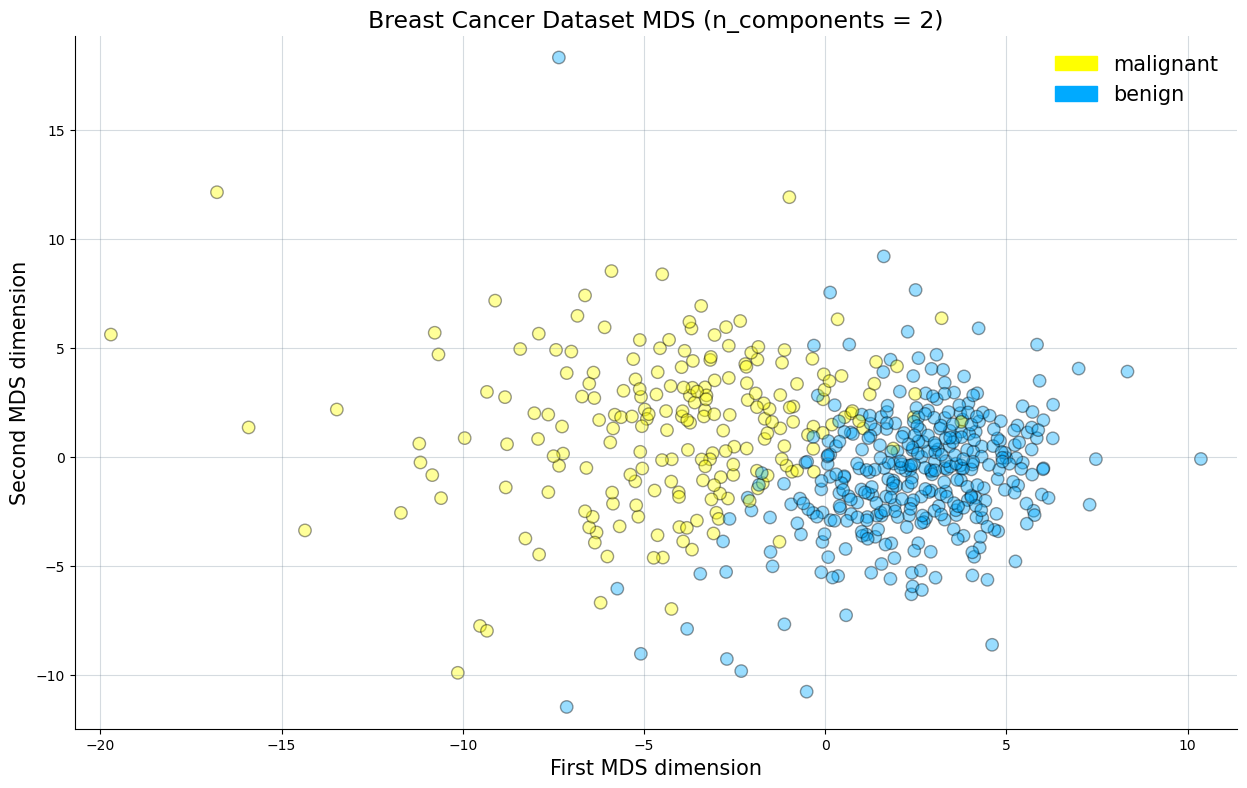

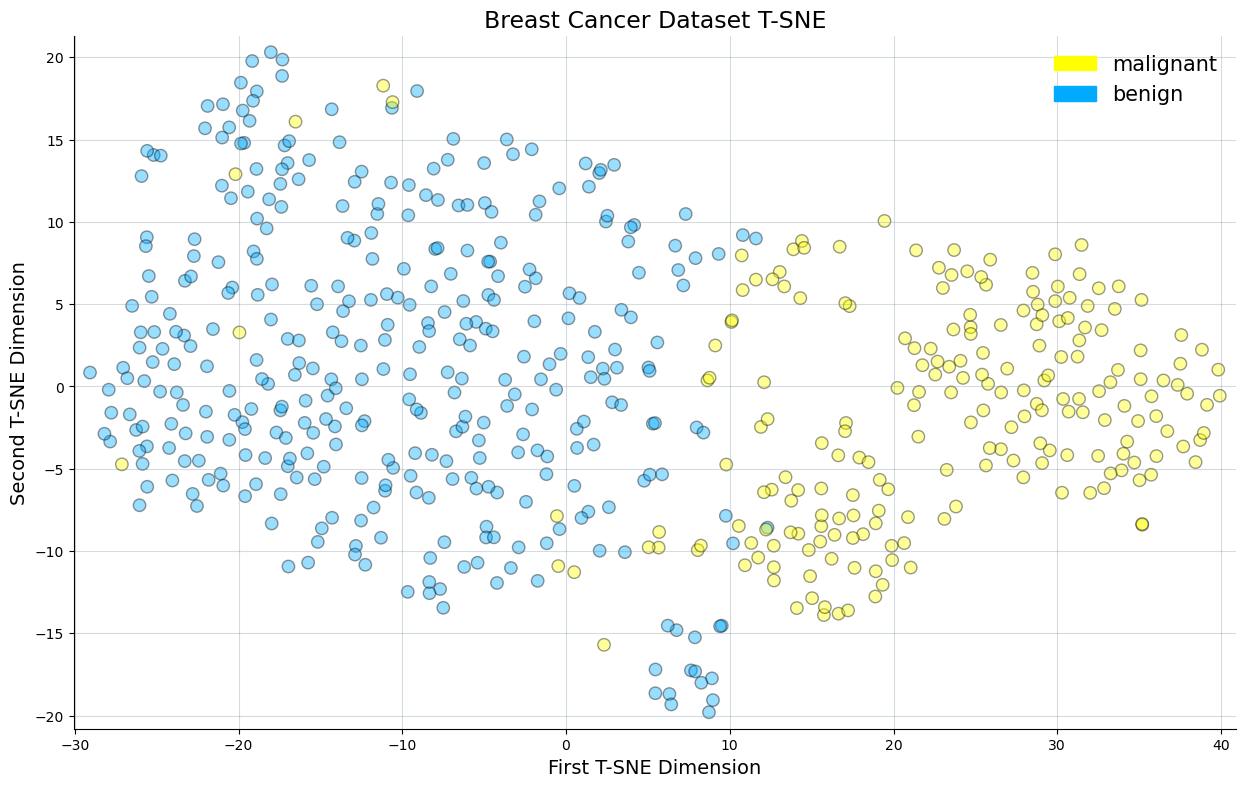

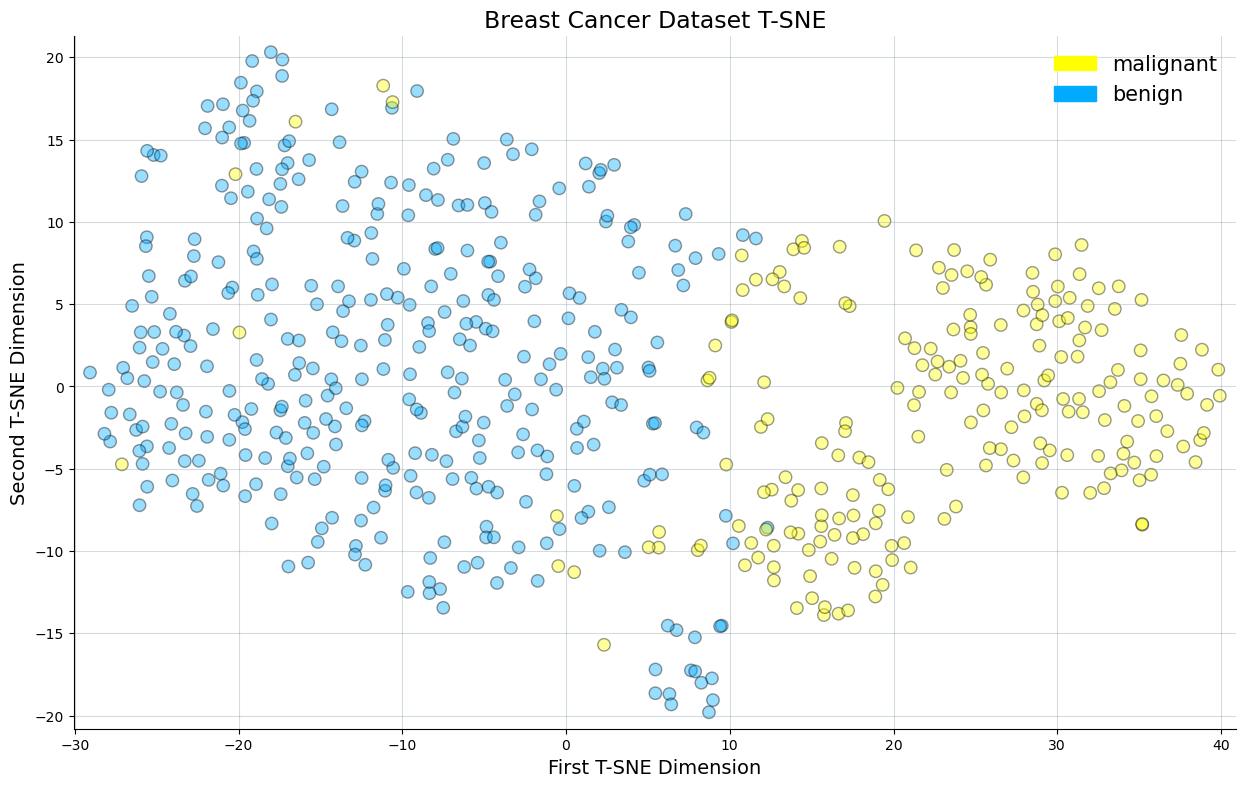

In [9]:
from sklearn.manifold import TSNE

tsne = TSNE(random_state = 42)

canc_tsne = tsne.fit_transform(canc_norm)

print('Number of Features in Breat Cancer DataSet Before T-SNE : {}\n\nNumber of Features in Breast Cancer DataSet After T-SNE : {}'
      .format(X_canc.shape[1],canc_tsne.shape[1]))

plot_labelled_scatter(canc_tsne, y_canc, ['malignant', 'benign'],(15,9))

plt.xlabel('First T-SNE Dimension',fontsize=14)
plt.ylabel('Second T-SNE Dimension',fontsize=14)
plt.title('Breast Cancer Dataset T-SNE',fontsize=17);
plt.show()